In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Test Plot soluzione analitica gamma = 0

In [2]:
l = 1
C = 1

In [3]:
def logistic(ts):
    x = []
    for t in ts:
        p = math.exp(l*t)/(math.exp(l*t)+C)
        x.append(p)
    return x

In [4]:
t = np.arange(-10,10,0.1)
x = logistic(t)
print(x[0])

4.5397868702434395e-05


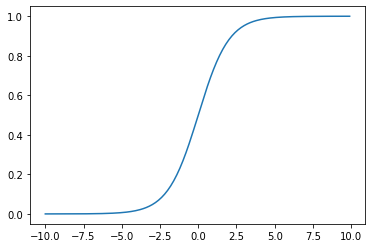

In [5]:
plt.plot(t,x)
plt.show()

# Test RK con gamma = 0, c.i. come sopra

In [6]:
#gamma = 0
tau = 1/100
tmax = 20
N = int(round(tmax/tau))

In [7]:
def f(x,t):
    return l*x*(1-x)#+gamma*math.sin(t)

In [8]:
x = [4.5397868702434395e-05]
t = [-10]

In [9]:
def RK(t,x,N,tau):
    for i in range(N):
        h=(tau/2)*f(x[i],t[i])
        x.append(x[i]+tau*f(x[i]+h,t[i]+(tau/2)))
        t.append(t[i]+tau)
    return t,x

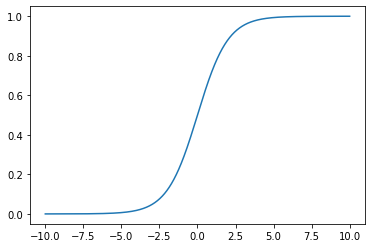

In [10]:
t,x = RK(t,x,N,tau)
plt.plot(t,x)
plt.show()

# RK con gamma <> 0, con t>=0 e lista di valori iniziali

In [11]:
gamma = 0.5
tmax = 10
N = int(round(tmax/tau))

In [12]:
t = [0]
xs = [[0.2], [0.5], [0.7], [1], [3], [10]]
print(len(xs))

6


In [13]:
def f(x,t):
    return l*x*(1-x)+gamma*math.sin(t)

In [14]:
def RK(t,x,N,tau):
    for i in range(N):
        h=(tau/2)*f(x[i],t[i])
        x.append(x[i]+tau*f(x[i]+h,t[i]+(tau/2)))
        t.append(t[i]+tau)
    return t,x

In [15]:
for j in range(len(xs)):
    t=[0]
    t,xs[j] = RK(t,xs[j],N,tau)

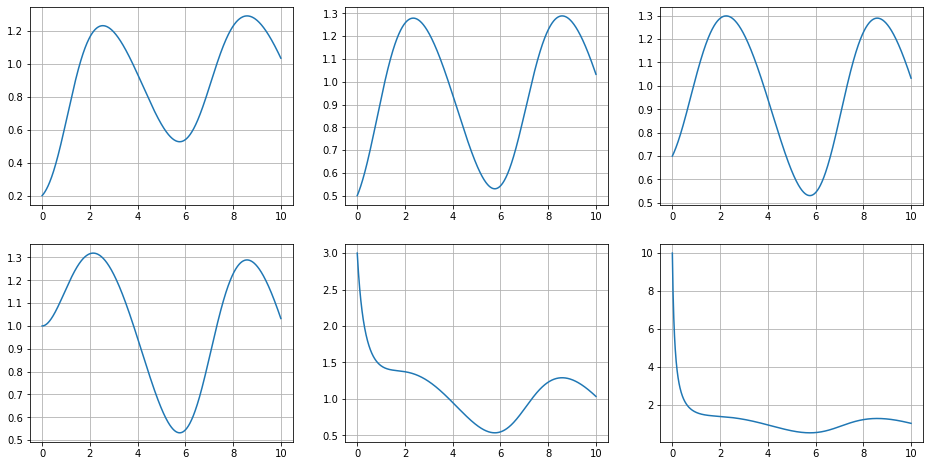

In [16]:
fig, axs = plt.subplots(2,3,figsize=(16,8))
for j in range(len(xs)):
    if(j<3):
        axs[0,j].plot(t,xs[j])
        axs[0,j].grid()
    else:
        axs[1,j-3].plot(t,xs[j])
        axs[1,j-3].grid()
plt.show()

# Poicaré map, T=2pi

In [37]:
tmax = 2*math.pi
N = 1000
tau = tmax/N
Lmax = 5
Lmin = -0.2

In [38]:
xs = np.linspace(Lmin,Lmax,1500)
y = []

In [39]:
for x0 in xs:
    t = [0]
    x = [x0]
    
    t,x = RK(t,x,N,tau)
    y.append(x[N])

/var/folders/_c/53p2ylxx1kvdwvv_9gnhx2c40000gn/T/ipykernel_23990/4104407044.py:2: RuntimeWarning: overflow encountered in double_scalars
  return l*x*(1-x)+gamma*math.sin(t)


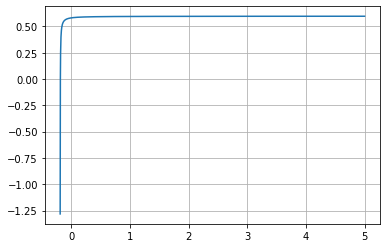

In [40]:
plt.plot(xs,y)
plt.grid()
plt.show()

# Find fixed points of Poincaré map

In [41]:
def fixPnt(x,y):
    return y-x

In [42]:
yFix = []
for i in range(len(y)):
    yFix.append(fixPnt(xs[i], y[i]))

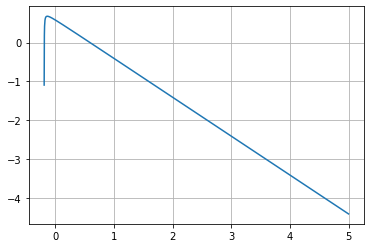

In [43]:
plt.plot(xs,yFix)
plt.grid()
plt.show()

In [44]:
eps = 10

In [45]:
def bisection(x,y,a,b):
    mFin = None
    m = int(math.floor((b+a)/2))
    if(y[m]<0.001):
        mFin = m
    else:
        if(y[m]*y[a] < 0):
            mFin, _ = bisection(x,y,a,m)
        else:
            mFin, _ = bisection(x,y,m,b)
    return mFin, x[mFin]

In [46]:
xSol = []
for i in range(int(len(y)/eps)-1):
    if(yFix[int(i*eps)]*yFix[int((i+1)*eps)] > 0):
        continue
    else:
        xSol.append(bisection(xs,yFix,int(i*eps),int((i+1)*eps)))

In [47]:
xSol

[(2, -0.1930620413609073), (229, 0.5943962641761174)]

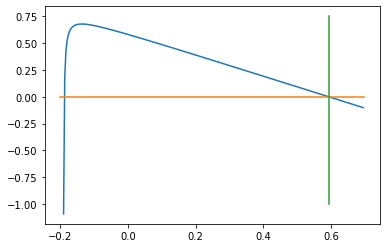

In [56]:
plt.plot(xs[xSol[0][0]-1:xSol[1][0]+30],yFix[xSol[0][0]-1:xSol[1][0]+30])
plt.plot(np.linspace(-0.2,xs[xSol[1][0]+30],2),np.zeros(2))

/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/jacopoperoni/.pyenv/versions/3.8.10/lib/python3.8/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y +

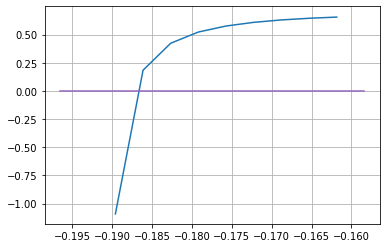

In [50]:
zeroPoint = xSol[0][0]
plt.plot(xs[zeroPoint-1:zeroPoint+10],yFix[zeroPoint-1:zeroPoint+10])
plt.plot(np.ones(50)*xs[zeroPoint-1], np.linspace(yFix[zeroPoint-1], yFix[zeroPoint+10], 50))
plt.plot(np.ones(50)*xSol[0][1], np.linspace(yFix[zeroPoint-1], yFix[zeroPoint+10], 50))
plt.plot(np.ones(50)*xs[zeroPoint+1], np.linspace(yFix[zeroPoint-1], yFix[zeroPoint+10], 50))
plt.plot(np.linspace(xs[zeroPoint-1], xs[zeroPoint+10], 50), np.zeros(50))
plt.grid()
plt.show()